<a href="https://colab.research.google.com/github/anastaszi/255_datamining/blob/main/HW6_Anastasia_Zimina_Apriory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write  colabs to demonstrate frequent pattern mining apriori and fpgrowth techniques

# Library Imports

In [ ]:
!pip install mlxtend --upgrade

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Data Import

Data: [Groceries Dataset from Kaggle](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [43]:
df = pd.read_csv('/content/gdrive/MyDrive/DM_HW/data/Groceries_dataset.csv')

In [44]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [45]:
def updateItems(x):
  x = x.split('/')
  x = (' ').join(x)
  x = x.split(' ')
  x = ('-').join(x)
  return x


In [46]:
df.itemDescription = df.itemDescription.apply(updateItems)

In [47]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical-fruit
1,2552,05-01-2015,whole-milk
2,2300,19-09-2015,pip-fruit
3,1187,12-12-2015,other-vegetables
4,3037,01-02-2015,whole-milk


In [48]:
all_items = ""
for index, row in df.iterrows():
    all_items = all_items + " " + row["itemDescription"]

<function matplotlib.pyplot.show>

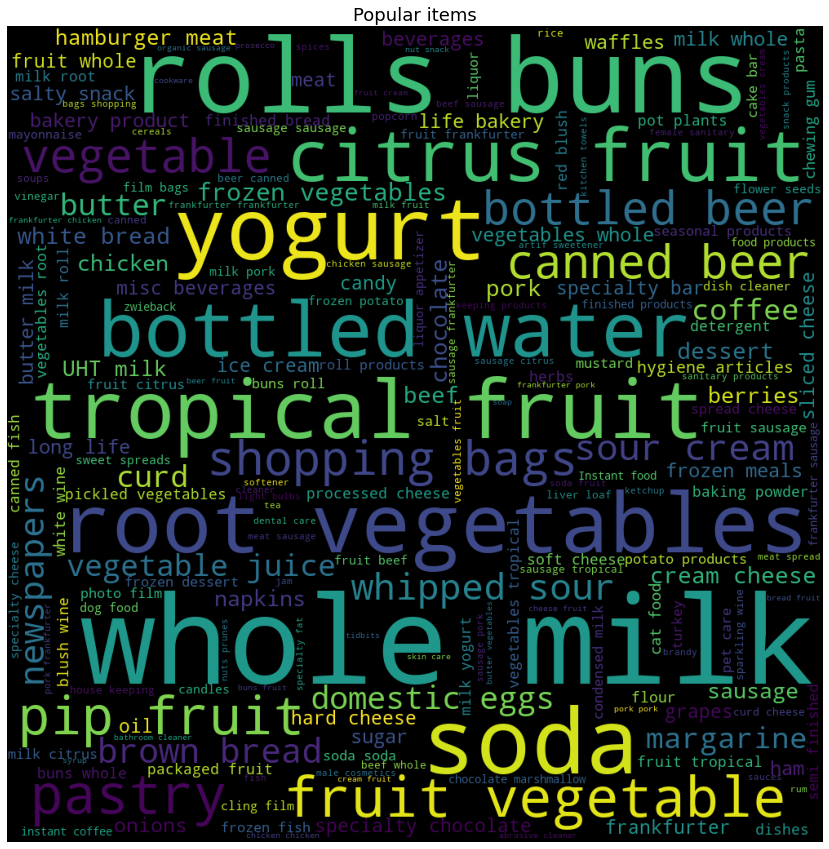

In [50]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color='black', width=1000, height=1000).generate(all_items)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular items', fontsize=18)
plt.show



In [51]:
df.itemDescription.unique()

array(['tropical-fruit', 'whole-milk', 'pip-fruit', 'other-vegetables',
       'rolls-buns', 'pot-plants', 'citrus-fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit-vegetable-juice',
       'packaged-fruit-vegetables', 'chocolate', 'specialty-bar',
       'butter-milk', 'bottled-water', 'yogurt', 'sausage', 'brown-bread',
       'hamburger-meat', 'root-vegetables', 'pork', 'pastry',
       'canned-beer', 'berries', 'coffee', 'misc.-beverages', 'ham',
       'turkey', 'curd-cheese', 'red-blush-wine',
       'frozen-potato-products', 'flour', 'sugar', 'frozen-meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed-cheese', 'fish',
       'sparkling-wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished-products', 'beverages', 'bottled-beer', 'dessert',
       'dog-food', 'specialty-chocolate', 'condensed-milk', 'cleaner',
       'white-wine', 'meat', 'ice-cream', 'hard-cheese', 'cream-cheese-',
       'liquor', 'pickled-vegetables', 'liquor-(appetizer

### Top 25 products

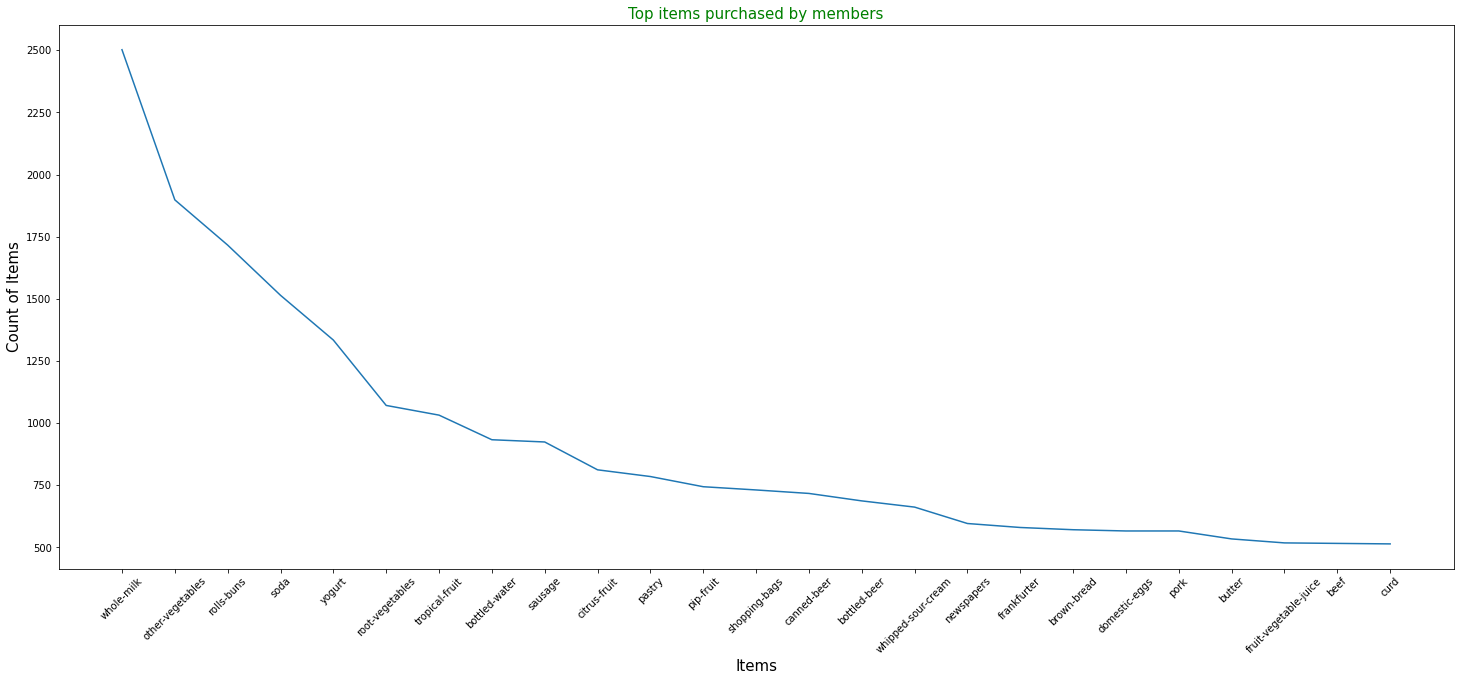

In [52]:
plt.figure(figsize=(25,10))
sns.lineplot(x = df.itemDescription.value_counts().head(25).index, y = df.itemDescription.value_counts().head(25).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top items purchased by members', color = 'green', size = 15)
plt.show()

In [53]:
df['itemDescription'] = df.groupby(['Member_number'])['itemDescription'].transform(lambda x: ','.join(x))

In [54]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,"tropical-fruit,long-life-bakery-product,meat,s..."
1,2552,05-01-2015,"whole-milk,butter,female-sanitary-products,pot..."
2,2300,19-09-2015,"pip-fruit,sausage,frankfurter,pork,other-veget..."
3,1187,12-12-2015,"other-vegetables,soda,citrus-fruit,onions,soda..."
4,3037,01-02-2015,"whole-milk,cling-film-bags,other-vegetables,ha..."


In [55]:
df.shape

(38765, 3)

### Create list of lists of items per transation
Each element in the list is a list of items bought by the customer

In [61]:
lst_of_transactions=[]
for index, row in df.iterrows():   
    data = row["itemDescription"].split(',')
    lst_of_transactions.append(data)

In [63]:
df.head(1)

,Member_number,Date,itemDescription
0,1808,21-07-2015,"tropical-fruit,long-life-bakery-product,meat,s..."


In [62]:
lst_of_transactions[0]

['tropical-fruit',
 'long-life-bakery-product',
 'meat',
 'sugar',
 'rolls-buns',
 'semi-finished-bread',
 'whole-milk',
 'citrus-fruit',
 'candy',
 'napkins']

### Transform to Logical data frame

TransactionEncoder transforms the dataseta into a logical data frame

In [71]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new.head(5)

,Instant-food-products,UHT-milk,abrasive-cleaner,artif.-sweetener,baby-cosmetics,bags,baking-powder,bathroom-cleaner,beef,berries,beverages,bottled-beer,bottled-water,brandy,brown-bread,butter,butter-milk,cake-bar,candles,candy,canned-beer,canned-fish,canned-fruit,canned-vegetables,cat-food,cereals,chewing-gum,chicken,chocolate,chocolate-marshmallow,citrus-fruit,cleaner,cling-film-bags,cocoa-drinks,coffee,condensed-milk,cooking-chocolate,cookware,cream,cream-cheese-,...,salt,salty-snack,sauces,sausage,seasonal-products,semi-finished-bread,shopping-bags,skin-care,sliced-cheese,snack-products,soap,soda,soft-cheese,softener,soups,sparkling-wine,specialty-bar,specialty-cheese,specialty-chocolate,specialty-fat,specialty-vegetables,spices,spread-cheese,sugar,sweet-spreads,syrup,tea,tidbits,toilet-cleaner,tropical-fruit,turkey,vinegar,waffles,whipped-sour-cream,whisky,white-bread,white-wine,whole-milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


## Apply Apriori

In [70]:
frq_apriory_items = apriori(df_new, min_support=0.02,use_colnames=True)
frq_apriory_items.head(5)

,support,itemsets
0,0.100248,(UHT-milk)
1,0.040682,(baking-powder)
2,0.149211,(beef)
3,0.100918,(berries)
4,0.078965,(beverages)


In [67]:
rules_apriori = association_rules(frq_apriory_items, metric = "confidence", min_threshold = 0.1)
rules_apriori.sort_values('confidence', ascending = False, inplace = True)
rules_apriori.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6443,"(brown-bread, yogurt, rolls-buns)",(whole-milk),0.030363,0.553297,0.024120,0.794393,1.435744,0.007320,2.172602
6039,"(other-vegetables, brown-bread, bottled-water)",(whole-milk),0.028067,0.553297,0.022057,0.785846,1.420296,0.006527,2.085893
7933,"(root-vegetables, shopping-bags, yogurt)",(whole-milk),0.027912,0.553297,0.021799,0.780961,1.411469,0.006355,2.039379
6523,"(tropical-fruit, canned-beer, other-vegetables)",(whole-milk),0.028712,0.553297,0.022211,0.773585,1.398137,0.006325,1.972939
3183,"(chocolate, pip-fruit)",(whole-milk),0.031111,0.553297,0.023604,0.758706,1.371247,0.006391,1.851285


## Apply FpGrowth

In [69]:
frq_fp_items = fpgrowth(df_new, min_support=0.02,use_colnames=True)
frq_fp_items.head(5)

,support,itemsets
0,0.553297,(whole-milk)
1,0.425446,(rolls-buns)
2,0.284181,(tropical-fruit)
3,0.225235,(citrus-fruit)
4,0.101176,(napkins)


In [72]:
rules_fp = association_rules(frq_fp_items, metric = "confidence", min_threshold = 0.1)
rules_fp.sort_values('confidence', ascending = False, inplace = True)
rules_fp.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5930,"(brown-bread, yogurt, rolls-buns)",(whole-milk),0.030363,0.553297,0.024120,0.794393,1.435744,0.007320,2.172602
5720,"(other-vegetables, brown-bread, bottled-water)",(whole-milk),0.028067,0.553297,0.022057,0.785846,1.420296,0.006527,2.085893
903,"(root-vegetables, shopping-bags, yogurt)",(whole-milk),0.027912,0.553297,0.021799,0.780961,1.411469,0.006355,2.039379
4487,"(tropical-fruit, canned-beer, other-vegetables)",(whole-milk),0.028712,0.553297,0.022211,0.773585,1.398137,0.006325,1.972939
1735,"(chocolate, pip-fruit)",(whole-milk),0.031111,0.553297,0.023604,0.758706,1.371247,0.006391,1.851285


# References:
* [Apriory](https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6)
* [FP Growth](https://towardsdatascience.com/fp-growth-frequent-pattern-generation-in-data-mining-with-python-implementation-244e561ab1c3)
* [User Guide Frequent Pattern mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/)
* [User Guide Apriory mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)